In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import utils
import seaborn as sns 
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler, scale
import matplotlib.pyplot as plt
from matplotlib import style 




In [24]:
import importlib
importlib.reload(utils)
savepath = 'ana_action_plan_dimentionality_report_3d'
filename = utils.Save.savepath('ana_action_plan_dimentionality', 'three_dot_dim.csv')
df_all = pd.read_csv(filename)
df_all_group = df_all.copy()
df_all_group['dim'] = 1-df_all_group['dim']
df_all_group['accuracy'] = df_all_group['accuracy']=='correct'
df_all_group = df_all_group.drop(['trial no.', 'selected dot', 'target dot'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()

df_all_group = df_all_group.drop(['actual control', 'angular bias'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant'])
df_all_group = df_all_group.mean().reset_index()
df_all_group.head()

# 	group	participant	accuracy	dim
# 0	H	K-Reg-H-10	0.800000	0.621495
# 1	H	K-Reg-H-11	0.516667	0.662570
# 2	H	K-Reg-H-12	0.616667	0.677885
# 3	H	K-Reg-H-13	0.816667	0.729195
# 4	H	K-Reg-H-14	0.583333	0.772255
# ...	...	...	...	...	...	...


,group,participant,accuracy,dim
0,H,K-Reg-H-10,0.800000,0.621495
1,H,K-Reg-H-11,0.516667,0.662570
2,H,K-Reg-H-12,0.616667,0.677885
3,H,K-Reg-H-13,0.816667,0.729195
4,H,K-Reg-H-14,0.583333,0.772255


In [28]:
# calculate correlation between accuracy and dim for each group
corrs = []
for group in df_all_group['group'].unique():
    df_group = df_all_group[df_all_group['group']==group]
    corr = scipy.stats.pearsonr(df_group['accuracy'], df_group['dim'])
    corrs.append([group, corr[0], corr[1]])
corrs = pd.DataFrame(corrs, columns=['group', 'corr', 'p'])
corrs

,group,corr,p
0,H,-0.183063,0.381089
1,S,-0.045971,0.827271


/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_core/plot.py:1525: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_core/plot.py:1525

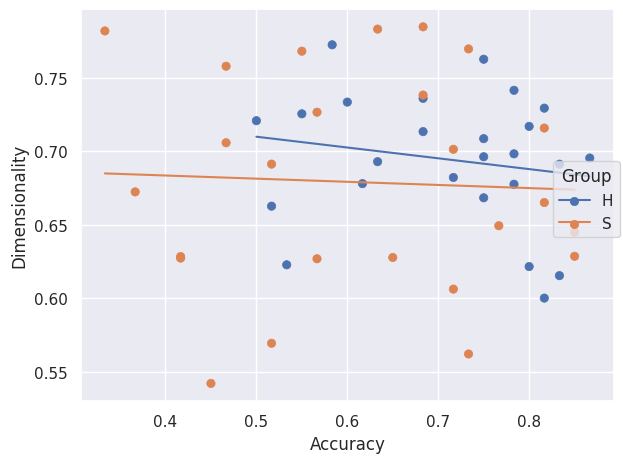

In [27]:
import seaborn.objects as so
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line for each group
p = (so.Plot(df_all_group, x="accuracy", y="dim", color="group")
     .add(so.Dot(), so.Jitter(.3))
     .add(so.Line(), so.PolyFit(order=1))
     .label(x="Accuracy", y="Dimensionality", color="Group"))

p.show()
